#**Regular Logistic Regression (Binary Classification)**


https://www.youtube.com/watch?v=zM4VZR0px8E

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
#STEP-2: Autheticate E-Mail ID
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#STEP-3: Get File from Drive using file-ID
downloaded = drive.CreateFile({'id':'1N0bJzD0Y4swS0uFFyOb_Mjr7TUJZ1Mvj'}) # replace the id with id of file you want to access
downloaded.GetContentFile('insurance_data.csv')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


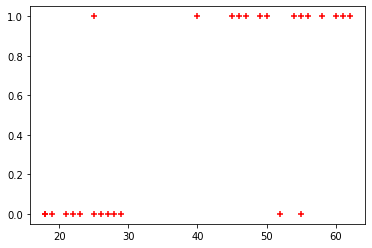

In [ ]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [ ]:
X = df[['age']]
y = df[['bought_insurance']]

In [ ]:
X

,age
0,22
1,25
2,47
3,52
4,46
5,56
6,55
7,60
8,62
9,61


In [ ]:
y

,bought_insurance
0,0
1,0
2,1
3,0
4,1
5,1
6,0
7,1
8,1
9,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size = 0.2)

In [ ]:
X_test.head()

,age
2,47
24,50
14,49
17,58
5,56


In [ ]:
X_train

,age
23,45
13,29
19,18
20,21
16,25
1,25
10,18
26,23
25,54
8,62


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
model.predict_proba(X_test)

array([[0.34030833, 0.65969167],
       [0.26925593, 0.73074407],
       [0.2918862 , 0.7081138 ],
       [0.13059794, 0.86940206],
       [0.15824269, 0.84175731],
       [0.81292397, 0.18707603]])

In [ ]:
model.score(X_test,y_test)

1.0

In [ ]:
y_predicted

array([1, 1, 1, 1, 1, 0])

**model.coef_ indicates value of m in y=m*x + b equation**

In [ ]:
model.coef_

array([[0.11216016]])

**model.intercept_ indicates value of b in y=m*x + b equation**

In [ ]:
model.intercept_

array([-4.60960684])

**Lets define sigmoid function now and do the math with hand**

In [ ]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [ ]:
def prediction_function(age):
    z = 0.12 * age - 4.6 # m = 0.11216016 =~ 0.12 & b = -4.60960684 =~ -4.6
    y = sigmoid(z)
    return y

In [ ]:
age = 35
prediction_function(age)

0.40131233988754816

**0.4013 is less than 0.5 which means person with 35 age will *not* buy insurance**

In [ ]:
age = 43
print(prediction_function(age))

print('{} is larger than 0.5 which means person with 43 age will buy an insurance'.format(prediction_function(age)))

0.6364525402815664
0.6364525402815664 is larger than 0.5 which means person with 43 age will buy an insurance




---



---



#**Logistic Regression in Python Step by Step in 10 minutes**
https://youtu.be/HYcXgN9HaTM

https://www.datarmatics.com/data-science/how-to-perform-logistic-regression-in-pythonstep-by-step/

Step 1: Import the required modules

In [ ]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

Step 2: Generate the dataset

In [ ]:
# Generate and dataset for Logistic Regression
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

In [ ]:
print(x)

[[-0.18169362]
 [-1.24342751]
 [ 1.4001047 ]
 [ 0.99752303]
 [ 0.24370096]
 [ 1.27868443]
 [ 1.64204147]
 [ 1.49087907]
 [ 1.67106053]
 [ 1.26670962]
 [-1.46663475]
 [-0.97365639]
 [ 1.05824879]
 [-0.12256149]
 [-1.7131285 ]
 [ 0.37363846]
 [-0.88474113]
 [ 0.83358437]
 [ 1.69091666]
 [-1.29254615]
 [ 1.24503945]
 [-1.28138897]
 [ 1.61397157]
 [ 0.06358602]
 [ 1.53705962]
 [-0.19060095]
 [-0.60324789]
 [ 0.6913747 ]
 [ 1.93152022]
 [ 0.78388747]
 [-0.52183743]
 [-1.56093077]
 [-0.57122824]
 [-2.11689787]
 [-1.80009702]
 [-1.12688443]
 [ 0.89486899]
 [-0.73576836]
 [-0.67855419]
 [-0.26707107]
 [ 1.7560637 ]
 [ 1.03973635]
 [ 1.27384348]
 [-0.54417212]
 [-1.5880279 ]
 [-0.17017034]
 [ 1.00587097]
 [-0.13189228]
 [-0.90363605]
 [ 0.06518805]
 [ 1.52589192]
 [ 1.11038086]
 [-0.93800401]
 [ 1.20356181]
 [-1.50662637]
 [-2.52967001]
 [-1.44536328]
 [ 1.20648344]
 [ 0.42600058]
 [-0.02332248]
 [ 1.13007794]
 [ 0.25182244]
 [-1.4623449 ]
 [ 0.56972822]
 [ 0.25402246]
 [-0.88874124]
 [ 0.82132

In [ ]:
print(y)

[0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1
 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0
 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1]


Step 3: Visualize the Data

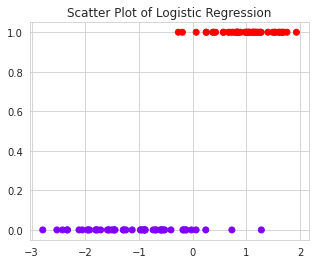

In [ ]:
# Create a scatter plot
plt.scatter(x, y, c=y, cmap='rainbow')
plt.title('Scatter Plot of Logistic Regression')
plt.show()

Step 4: Split the Dataset

In [ ]:
# Split the dataset into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

Step 5: Perform Logistic Regression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [ ]:
# Show to Coeficient and Intercept
print(log_reg.coef_)
print(log_reg.intercept_)

[[2.64956546]]
[-0.20719728]


Step 6: Make prediction using the model

In [ ]:
# Perform prediction using the test dataset
y_pred = log_reg.predict(x_test)

Step 7: Display the Confusion Matrix

In [ ]:
# Show the Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[15,  1],
       [ 1,  8]])



---



---



#**Logistic Regression Python Sklearn**

https://youtu.be/VK6v9Ure8Lk

Import modules

In [10]:
from pydataset import data
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [11]:
titanic =  data('titanic')
titanic.head()

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes


In [12]:
#Feature engineering (One hot encoding)

titanic = pd.get_dummies(titanic,drop_first = True)
titanic

,class_2nd class,class_3rd class,age_child,sex_women,survived_yes
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
5,0,0,0,0,1
...,...,...,...,...,...
1312,0,1,1,1,0
1313,0,1,1,1,0
1314,0,1,1,1,0
1315,0,1,1,1,0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('survived_yes',axis = 1),titanic['survived_yes'],random_state=0,test_size = 0.2)

In [15]:
LogReg = LogisticRegression(solver = 'lbfgs')
LogReg.fit(X_train,y_train)

LogisticRegression()

In [17]:
#predicting if a class-1 child-age girl survived
LogReg.predict(np.array([[0,0,1,1]]))[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


1

In [19]:
#predicting if a class-3 adult-age male survived
LogReg.predict(np.array([[0,1,0,0]]))[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


0

In [20]:
#Evaluating the model
LogReg.score(X_test, y_test)

0.7575757575757576

In [21]:
#Manually calculating the score
prediction = (LogReg.predict(X_test)>0.5).astype(int)
np.sum(prediction == y_test)/len(y_test)

0.7575757575757576



---



---



#**Logistic Regression (Multiclass Classification)**

https://youtu.be/J5bXOOmkopc

In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()

In [ ]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

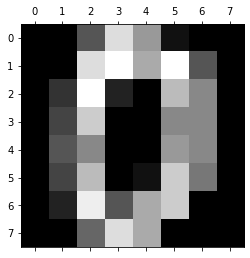

In [ ]:
plt.matshow(digits.images[0])

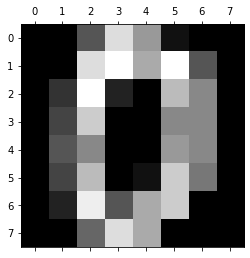

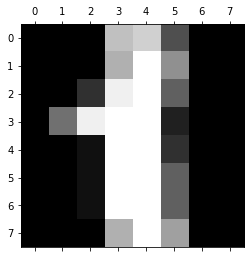

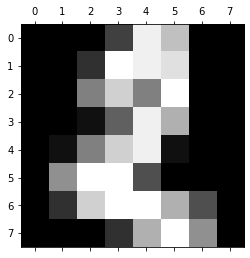

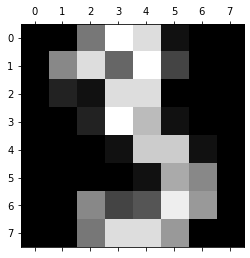

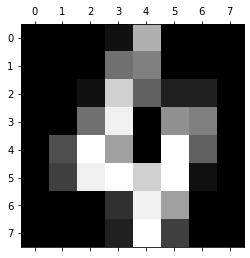

In [ ]:
#plt.gray() 
for i in range(5):
    plt.matshow(digits.images[i]) 

In [ ]:
digits.images[67]

array([[ 0.,  0.,  5., 14.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 12.,  9.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 15.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  1., 16.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., 16.,  2.,  7.,  4.,  0.,  0.],
       [ 0.,  3., 16., 16., 16., 16.,  9.,  0.],
       [ 0.,  0., 15., 15.,  4., 10., 16.,  0.],
       [ 0.,  0.,  4., 14., 16., 12.,  7.,  0.]])

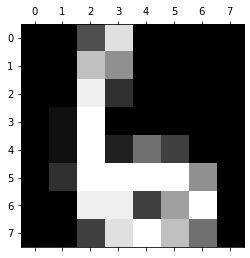

In [ ]:
plt.matshow(digits.images[67])

In [ ]:
digits.target[67]

6

In [ ]:
model.predict([digits.data[67]])

array([6])

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

#Create and train logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
X_train

array([[ 0.,  0.,  1., ..., 12.,  8.,  0.],
       [ 0.,  1., 15., ..., 12.,  3.,  0.],
       [ 0.,  0.,  5., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  6.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ...,  6.,  0.,  0.]])

In [ ]:
X_test

array([[ 0.,  0.,  4., ..., 11.,  0.,  0.],
       [ 0.,  0.,  0., ..., 15.,  2.,  0.],
       [ 0.,  0.,  7., ...,  7.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., 15., ...,  0.,  0.,  0.],
       [ 0.,  3., 12., ...,  6.,  0.,  0.]])

#**Measure accuracy of our model**

In [ ]:
model.score(X_test, y_test)

0.9777777777777777

In [ ]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [ ]:
digits.data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

#**Confusion Matrix**

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  1, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 28,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 25,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 42]])

Text(69.0, 0.5, 'Truth')

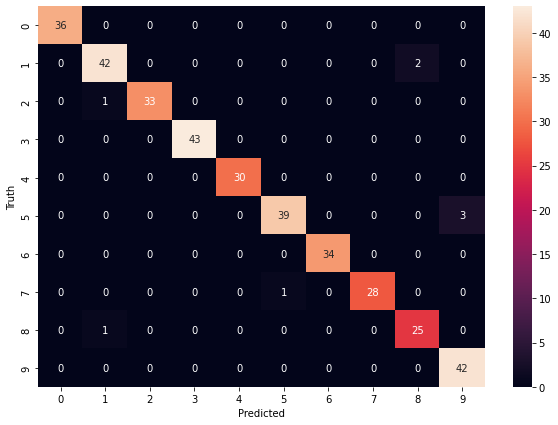

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')



---



---



#**Logistic Regression Machine Learning Method Using Scikit Learn and Pandas Python**


https://youtu.be/1nWFHa6K23w

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
#STEP-2: Autheticate E-Mail ID
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#STEP-3: Get File from Drive using file-ID
downloaded = drive.CreateFile({'id':'17b7i2-8hsvmLO2-sjM0EAnpk8EwC-n5k'}) # replace the id with id of file you want to access
downloaded.GetContentFile('mtcars.csv')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from scipy.stats import spearmanr
from pylab import rcParams
from sklearn.linear_model import LogisticRegression

In [ ]:
rcParams['figure.figsize'] =5,4
sb.set_style('whitegrid')

In [ ]:
cars = pd.read_csv('mtcars.csv')
cars.columns = ['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Checking independence between features

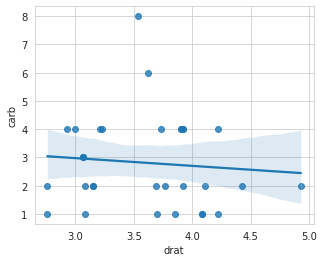

In [ ]:
sb.regplot(x='drat',y = 'carb',data = cars,scatter=True)

In [ ]:
drat = cars['drat']
carb = cars['carb']
spearmanr_coefficient, p_value = spearmanr(drat,carb)
print('Spearmanr Rank Coefficient {}'.format(spearmanr_coefficient))

Spearmanr Rank Coefficient -0.1252229399201802


Model Deployment

In [ ]:
LogReg = LogisticRegression()
LogReg.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
print(LogReg.score(X,y))

0.8888888888888888


In [ ]:
y_pred = LogReg.predict(X)
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.87      0.93      0.90        14

    accuracy                           0.89        27
   macro avg       0.89      0.89      0.89        27
weighted avg       0.89      0.89      0.89        27

